In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io # Using scikit-image to load a sample image

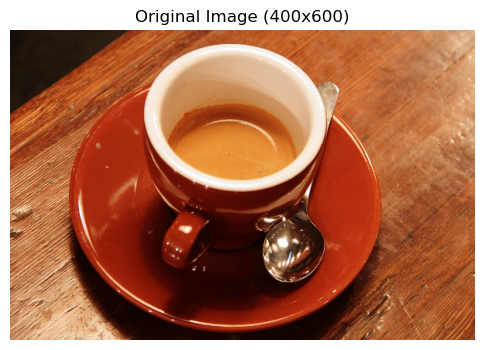

Original image shape: (400, 600, 3)


In [4]:
# Load the image
# You can use a sample image from the web
# image = io.imread('https://example.com/your_image.jpg')
# For this example, let's use a standard scikit-image sample
from skimage import data
image = data.coffee() # This is a sample image of a cup of coffee

# Or load your own image file
# from PIL import Image
# image = np.array(Image.open('your_image_file.jpg'))


# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title(f'Original Image ({image.shape[0]}x{image.shape[1]})')
plt.axis('off')
plt.show()

# Print image dimensions
print(f"Original image shape: {image.shape}")

### Preprocess the Image

In [6]:
# Normalize the image to floats between 0 and 1
image_norm = image.astype(np.float64) / 255

# Reshape the image to be a 2D array of pixels (rows) and RGB values (columns)
h, w, d = image_norm.shape
image_2d = image_norm.reshape(h * w, d)

print(f"Reshaped image for K-Means: {image_2d.shape}")

Reshaped image for K-Means: (240000, 3)


### Apply K-Means Clustering

In [8]:
# Set the number of colors (clusters) you want in the compressed image
n_colors = 16 

In [10]:
# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=n_colors, random_state=42)
kmeans.fit(image_2d)

# The cluster centers are our new colors (the new palette)
new_colors = kmeans.cluster_centers_

# The labels tell us which cluster each original pixel belongs to
labels = kmeans.labels_

print(f"K-Means clustering complete. Found {len(new_colors)} representative colors.")

K-Means clustering complete. Found 16 representative colors.


### Reconstruct the Compressed Image

In [12]:
# Recreate the image by replacing each pixel with its corresponding centroid color
# We use the labels to find the right color from our new_colors palette
compressed_image_2d = new_colors[labels]

# Reshape the 2D pixel array back to the original image dimensions
compressed_image = compressed_image_2d.reshape(h, w, d)

# Denormalize the image back to 0-255 range for display
compressed_image = (compressed_image * 255).astype(np.uint8)

print("Image reconstruction complete.")

Image reconstruction complete.


### Display and Compare the Results

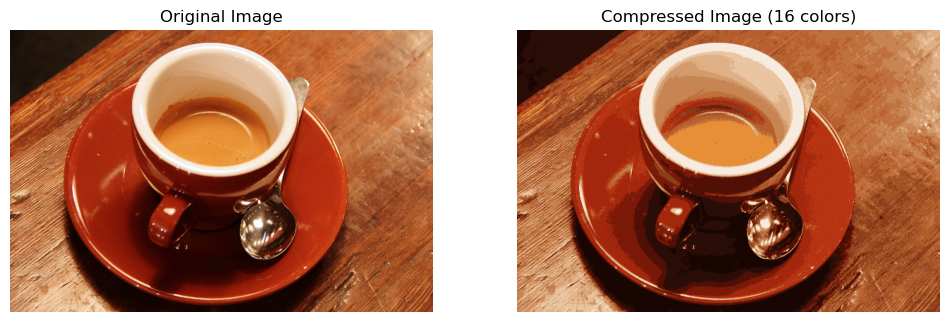

In [14]:
# Display the original and compressed images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(compressed_image)
ax2.set_title(f'Compressed Image ({n_colors} colors)')
ax2.axis('off')

plt.show()

# You can save the compressed image
# io.imsave('compressed_image.jpg', compressed_image)